## **Statistics for Business Pacmann - Avocado Price** <br/>
oleh Randitya Teri Ariyanto


## **Table of Content** <br/>
  Introduction <br/>
  Part I - Data Cleaning <br/>
  Part II - Uji T Test <br/>
  Part III - Regression Model <br/>
  Conclusion <br/>
  Reference <br/>

## **Introduction**
Project ini untuk memenuhi tugas pacmann dalam materi Statistical fo Business. Project ini melalukan uji T Test dan membuat regresi.

## **Part I - Data Cleaning** </br>
Untuk memulai project ini, kita harus mengimpor file avocado.csv dan import semua libraries


In [41]:
from google.colab import files
uploaded = files.upload()

Saving avocado.csv to avocado (1).csv


In [42]:
#Libraries
import pandas as pd
import scipy.stats as sp
import seaborn as sns
import numpy as np
import io
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp


#set df
df = pd.read_csv(io.BytesIO(uploaded['avocado.csv']))

In [43]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [44]:
#Cek missing values
print(df.isna().sum())
print(f"Tidak ditemukan missing values pada data")

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64
Tidak ditemukan missing values pada data


<Axes: xlabel='AveragePrice', ylabel='Count'>

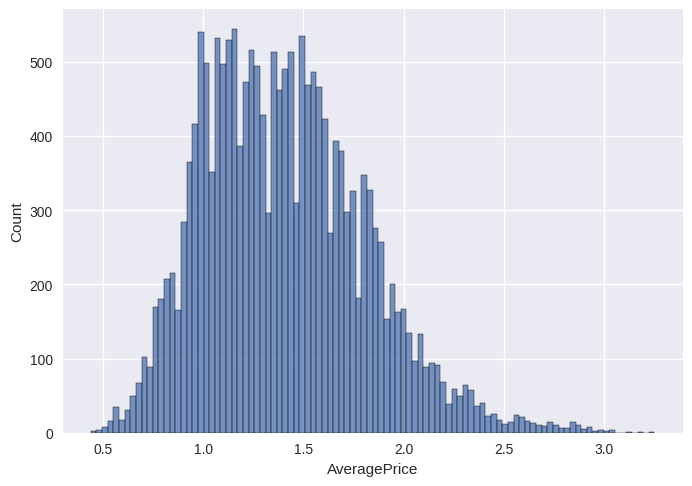

In [45]:
#Visualisasi data histplot
sns.histplot(data=df,x="AveragePrice", bins=100)

Ditemukan outlier yang cukup ekstrim


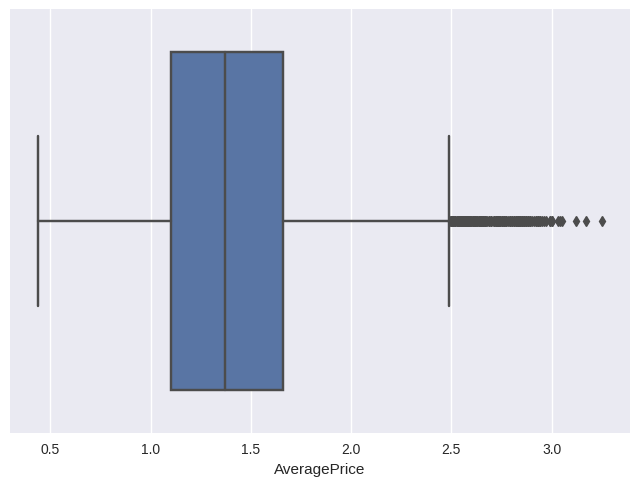

In [46]:
#Visualisasi data histplot untuk mencari outlier
sns.boxplot(data=df,x="AveragePrice")
print(f"Ditemukan outlier yang cukup ekstrim")

<Axes: xlabel='AveragePrice', ylabel='Count'>

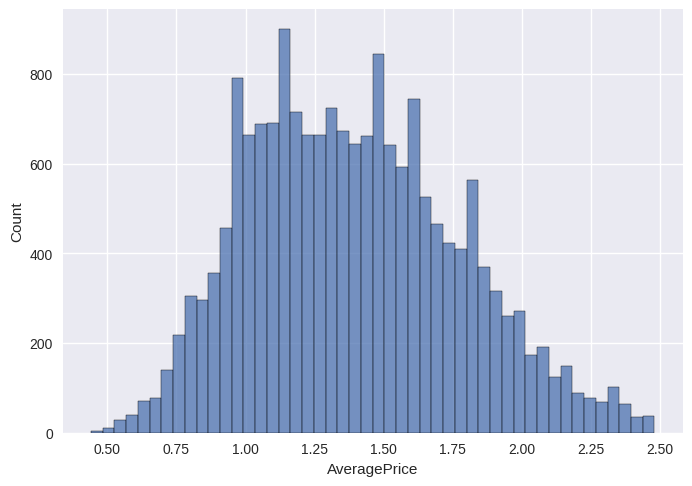

In [47]:
#Mengatasi outlier

# batas atas data
batas_atas = df["AveragePrice"].quantile(q=0.75) * 1.5

# plot tanpa outlier
property_without_outlier = df[df["AveragePrice"] < batas_atas]

# plot kolom AveragePrice tanpa extreme outlier
sns.histplot(property_without_outlier["AveragePrice"])

Outlier tidak seekstrim data awal


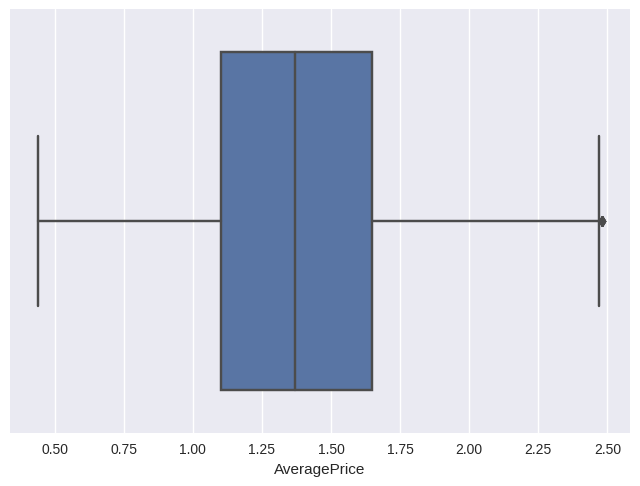

In [48]:
# batas atas data
batas_atas = df["AveragePrice"].quantile(q=0.75) * 1.5

# Mencari nilai median
median = df["AveragePrice"].median()

# mengubah nilai outlier dengan median
df.loc[df["AveragePrice"] > batas_atas, "AveragePrice"]= median

# menampilkan visualisasi
sns.boxplot(data=df,x="AveragePrice")

print(f"Outlier tidak seekstrim data awal")

## **Part II Uji T-Test** </br>
Seorang penjual avocado ingin menaikan harga dari rerata dengan harapan  lebih mendapatkan untung. Harga akan dinaikan menjadi $1.38. </br>
Penjual memiliki data dari berbagai daerah dalam rentang tahun 2015 - 2018

**Define Hyphoteses** </br>
𝐻0:𝜇≤1.38 </br>
𝐻1:𝜇>1.38 </br>

Mean of AveragePrice in samples = $1.39
Standard deviation of AveragePrice in samples = $0.38


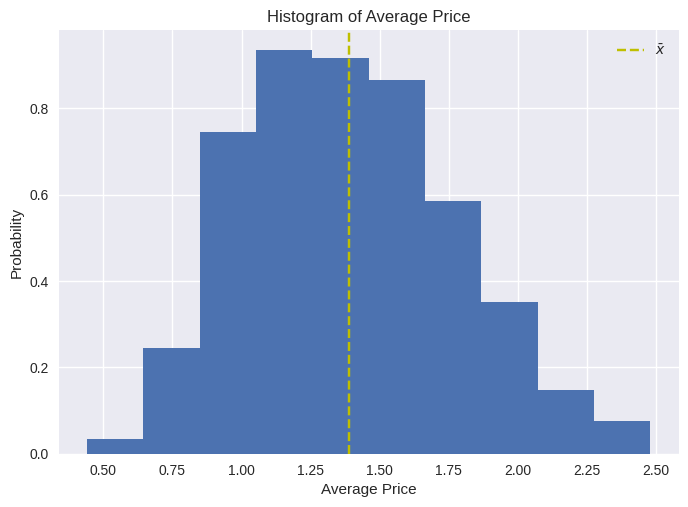

In [49]:
#visualisasi dan mencari mean + std dev

plt.hist(df["AveragePrice"], density = True)

mean_rent = np.mean(df["AveragePrice"])
std_rent = np.std(df["AveragePrice"])

print(f"Mean of AveragePrice in samples = ${np.round(mean_rent,2)}")
print(f"Standard deviation of AveragePrice in samples = ${np.round(std_rent,2)}")

plt.axvline(mean_rent, color ="y", linestyle = "--", label = r"$\bar{x}$")
plt.xlabel('Average Price')
plt.ylabel('Probability')
plt.title('Histogram of Average Price')
plt.legend()
plt.show()

In [50]:
#Uji T Test

t_statistics, p_value = ttest_1samp(a = df["AveragePrice"], popmean=1.38, alternative='greater')
print(f"t stats : {t_statistics:.4f}")
print(f"p-value : {p_value:.4f}")

t stats : 3.7339
p-value : 0.0001


In [51]:
#T critical

t_crit = sp.t.ppf(1-0.01, df = 114)
print(t_crit)

2.3595037356523183


In [52]:
if p_value<0.01:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


In [53]:
if t_statistics>t_crit:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


<ipython-input-54-d94c6791b9ce>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


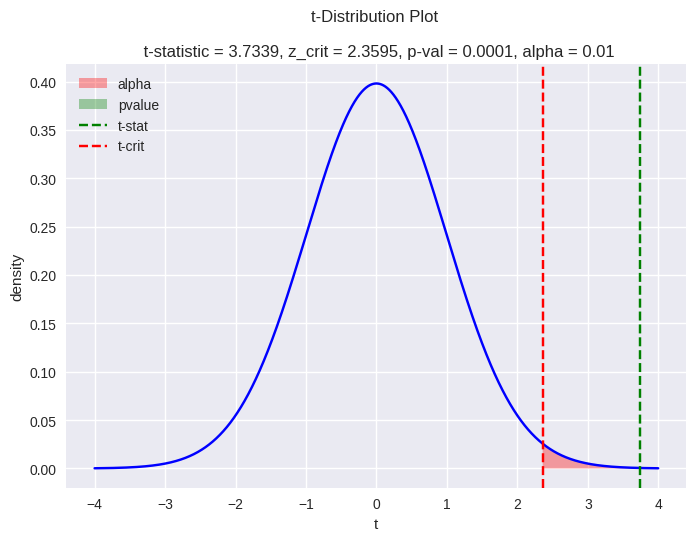

In [54]:
# Visualization

plt.style.use('seaborn')

# plot sample distribution 
x = np.arange(-4, 4, 0.001)
plt.plot(x, sp.t.pdf(x, df = 114), 
         color='blue')

# plot alpha region
x_alpha = np.arange(t_crit, 4, 0.01)
y_alpha = sp.t.pdf(x_alpha, df = 114)
plt.fill_between(x = x_alpha, 
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(t_statistics, 4, 0.01)
y_pvalue = sp.t.pdf(x_pvalue, df = 114)
plt.fill_between(x = x_pvalue, 
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35, 
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(t_statistics, 4), 
            color ="green", 
            linestyle = "--", 
            label ="t-stat")
plt.axvline(t_crit, 
            color ="red", 
            linestyle = "--", 
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")

plt.title(f't-Distribution Plot \n\n t-statistic = {np.round(t_statistics, 4)}, z_crit = {np.round(t_crit, 4)}, p-val = {np.round(p_value, 4)}, alpha = 0.01');

In [55]:
from statsmodels.stats.weightstats import _tconfint_generic

ci_low, ci_upp = _tconfint_generic(mean = mean_rent, 
                                   std_mean = std_rent, 
                                   dof = 114, alpha=0.01, 
                                   alternative='two-sided')

print(f"Average Price Avocado ${ci_low:.2f} and ${ci_upp:.2f}")

Average Price Avocado $0.40 and $2.38


**Result** <br/>

P-value lebih kecil dari significance level sehingga kita dapat menolak null hipotesis<br/>

Berdasarkan data, menolak harga rerataan avocado dibawah atau sama dengan $1.38 <br/>

Kepercayaan 99% bahwa harga rerataan avocado berada direntang 0.40 sampai 2.38 <br/>

## **Part III Regression** </br>
Penjual ingin melihat hubungan antara harga rerataan avocado dari tahun ke tahun

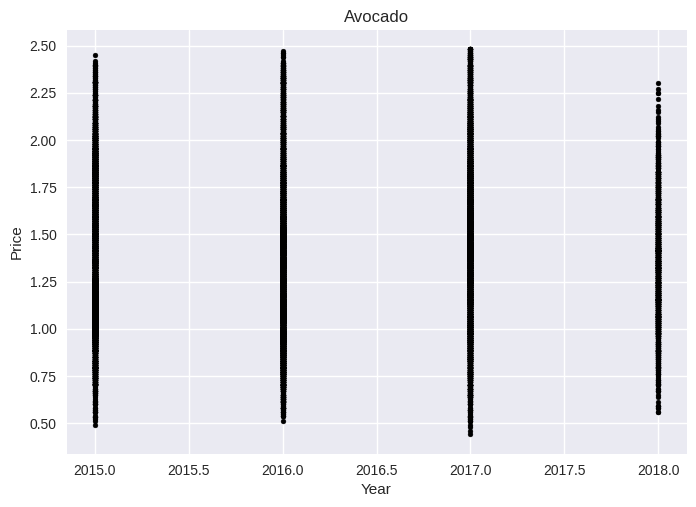

In [56]:
x = df["year"]
y = df["AveragePrice"]

# Plot the data
plt.scatter(x, y, marker=".", color = "k")

# Add a legend and labels

plt.xlabel("Year")
plt.ylabel("Price")

# Add a title and adjust the margins
plt.title("Avocado")

# Show the plot
plt.show()

In [57]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [61]:
# Create OLS model object
model = smf.ols('AveragePrice ~ year',df)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_average_price = print_coef_std_err(results)

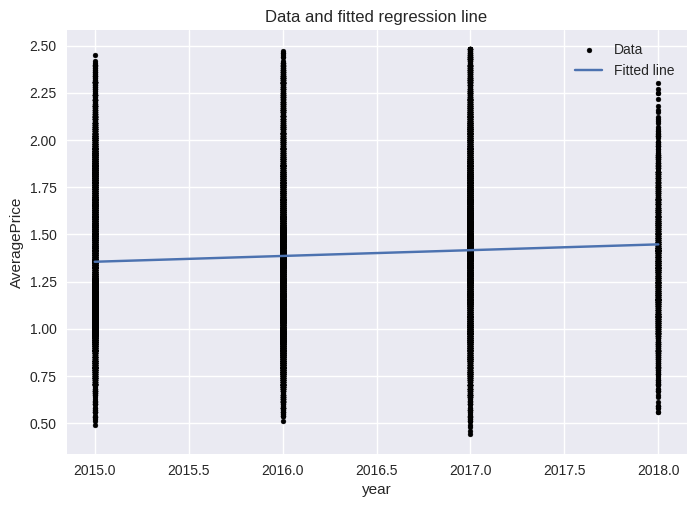

In [62]:
predictor = "year"
outcome = "AveragePrice"
data = df.copy()
results_ = results_average_price.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [63]:
results_average_price

,coef,std err
Intercept,-60.531228,5.968472
year,0.030713,0.002960


**Result** <br/>

y = -60 + 0.03x<br/>

rerataan harga avocado pada tahun 0 adalah -60 <br/>
rerataan harga avocado dengan perbedaan 1 tahun adalah 0.03 <br/>